In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [23]:
def create_big_df(dir_path):
    #create battery df to add al the battery levels to
    battery_df = pd.DataFrame(columns=['timestamp', 'battery'])

    for file in tqdm(sorted(os.listdir(dir_path))):
        if '_records.csv' in file:
            
            #load file make into df
            temp_df = pd.read_csv(dir_path+'/'+file)
            temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'])
            temp_df.rename(columns={'developer_field':'battery'}, inplace=True)
            temp_df.drop(columns=['heart_rate'], inplace=True)


            #concat with big df
            battery_df = pd.concat((battery_df, temp_df), axis=0, ignore_index=True)
            
    return battery_df


def perform_analysis(df):
    print('\n\n')
    print('-' *50)
    NANOSEC_TO_MIN = 6*1e10
    #do the linear reggrsion coeffice 
    X = df['timestamp'].astype(int).to_numpy().reshape(-1, 1)
    y = df['battery'].to_numpy().reshape(-1,1)

    reg = LinearRegression().fit(X, y)
    decrease_per_min = reg.coef_[0][0] * NANOSEC_TO_MIN

    hours_from_100_to_0 = -1 *(100 // decrease_per_min / 60)
    print(f'Decrease in % per min: {decrease_per_min:.04f}')
    print(f'100 -> 0 would take: {hours_from_100_to_0:.2f}')


    #get the R^2
    r2 = reg.score(X, y)
    print(f'R^2: {r2:.3f}')

    #get RMSE
    y_pred = reg.predict(X)
    rmse = root_mean_squared_error(y, y_pred)
    print(f'RMSE: {rmse:.3f}')

    #plot
    plt.scatter(x=df['timestamp'], y=df['battery'])
    plt.plot(df['timestamp'], y_pred, c='r')
    plt.show()

def analyze_battery(path):
    df = create_big_df(path)
    perform_analysis(df)

  0%|          | 0/111 [00:00<?, ?it/s]

/tmp/ipykernel_47883/1391467169.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  battery_df = pd.concat((battery_df, temp_df), axis=0, ignore_index=True)
100%|██████████| 111/111 [00:00<00:00, 215.17it/s]





--------------------------------------------------
Decrease in % per min: -0.0069
100 -> 0 would take: 242.02
R^2: 0.999
RMSE: 0.369


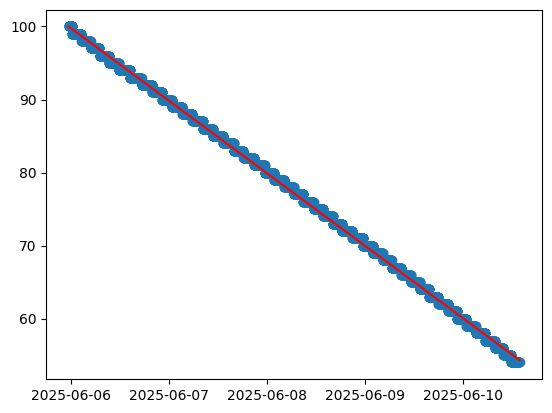

In [24]:
analyze_battery('/home/kuba/Documents/data/garmin/3504438977-id/csv')

  0%|          | 0/21 [00:00<?, ?it/s]/tmp/ipykernel_47883/1391467169.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  battery_df = pd.concat((battery_df, temp_df), axis=0, ignore_index=True)
100%|██████████| 21/21 [00:00<00:00, 190.56it/s]





--------------------------------------------------
Decrease in % per min: -0.0072
100 -> 0 would take: 231.93
R^2: 0.981
RMSE: 0.306


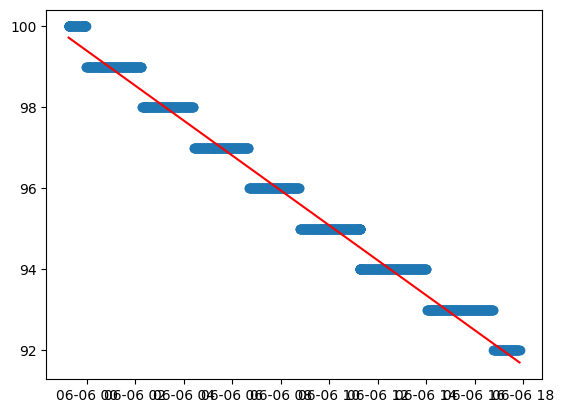

In [25]:
analyze_battery('/home/kuba/Documents/data/garmin/3506253834-id/2025-06-05-19-24-53/csv')


  0%|          | 0/24 [00:00<?, ?it/s]/tmp/ipykernel_47883/1391467169.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  battery_df = pd.concat((battery_df, temp_df), axis=0, ignore_index=True)
100%|██████████| 24/24 [00:00<00:00, 56.40it/s]





--------------------------------------------------
Decrease in % per min: -0.0097
100 -> 0 would take: 171.95
R^2: 0.990
RMSE: 0.429


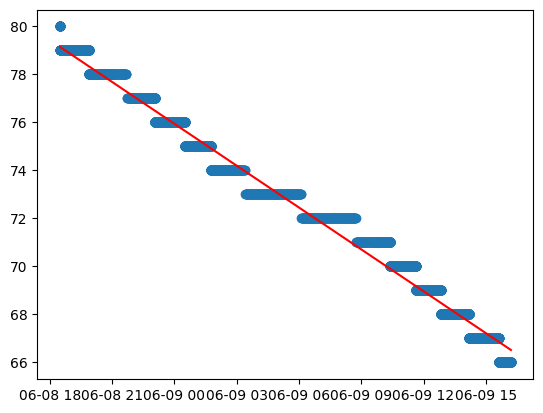

In [26]:
analyze_battery('/home/kuba/Documents/data/garmin/3506253834-id/2025-06-08-14-29-54/csv')